In [1]:
import plotly.graph_objects as go
import numpy as np
import pandas as pd
import src.utils as utils

from src.Data import Data
from src.Camera import Camera
from src.Plot import Plot
from src.VisualOdometry import VisualOdometry

import matplotlib.pyplot as plt

In [2]:
data = Data()
camera = Camera('data/camera.dat')

Ground truth pose: 
 [[1.  0.  0.  0.2]
 [0.  1.  0.  0. ]
 [0.  0.  1.  0. ]
 [0.  0.  0.  1. ]]
Estimated pose: 
 [[ 1.  0.  0. -0.]
 [-0.  1.  0. -0.]
 [-0. -0.  1. -1.]
 [ 0.  0.  0.  1.]]
Estimated pose world frame: 
 [[ 0.  -1.  -0.  -0. ]
 [ 0.   0.  -1.  -0. ]
 [ 1.   0.   0.  -1.2]
 [ 0.   0.   0.   1. ]]


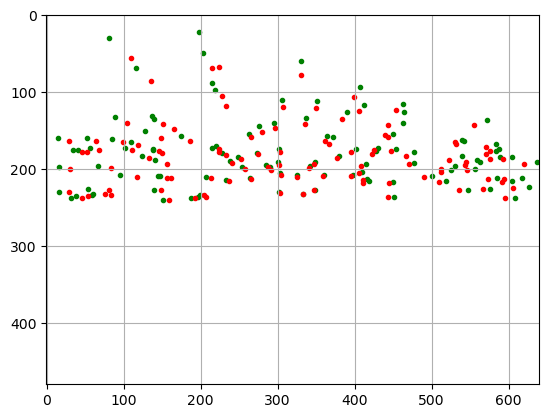

In [3]:
vo = VisualOdometry(camera, data)
vo.initialize()

index = 1

measurements = data.get_measurement_points(index)
matches = vo.data_association(measurements, vo.get_map())
image_points = matches['points_1']
world_points = matches['points_2']
appearances = matches['appearances']

x_gt, y_gt, theta_gt = data.get_trajectory()[index]['ground_truth_pose']
w_T_r = utils.v2T(np.array([x_gt, y_gt, 0, 0, 0, theta_gt]))
print('Ground truth pose: \n', np.round(w_T_r, 2))

r_T_c = camera.get_camera_transform()
estimated_w_T_c = vo.get_trajectory()['poses'][index]
estimated_w_T_r = estimated_w_T_c @ np.linalg.inv(r_T_c)
print('Estimated pose: \n', np.round(estimated_w_T_c, 2))
print('Estimated pose world frame: \n', np.round(estimated_w_T_r, 2))

projected_points = []
projected_points_gt = []
for i in range(len(world_points)):
    proj_image_point_hom, proj_image_point = camera.project_point(world_points[i])
    if proj_image_point_hom is None or proj_image_point is None:
        continue    
    projected_points.append(proj_image_point)

    proj_image_point_hom_gt, proj_image_point_gt = camera.project_point(world_points[i])
    if proj_image_point_hom_gt is None or proj_image_point_gt is None:
        continue
    projected_points_gt.append(proj_image_point_gt)

fig, ax = plt.subplots()
ax.imshow(np.ones((480, 640, 3)))
ax.scatter([point[0] for point in image_points], [point[1] for point in image_points], color='green', marker='.')
ax.scatter([point[0] for point in projected_points], [point[1] for point in projected_points], color='red', marker='.')
#ax.scatter([point[0] for point in projected_points_gt], [point[1] for point in projected_points_gt], color='blue', marker='*')
plt.grid()
plt.show()

In [4]:
pose_0 = vo.get_trajectory()['poses'][0]
pose_1 = vo.get_trajectory()['poses'][1]

world_points = vo.get_map()['points']
print('Number of world points: ', len(world_points))

x_coords = [point[0] for point in world_points]
y_coords = [point[1] for point in world_points]
z_coords = [point[2] for point in world_points]

fig = go.Figure()
fig.add_trace(go.Scatter3d(x=x_coords, y=y_coords, z=z_coords, mode='markers', marker=dict(size=2)))

fig.add_trace(go.Scatter3d(x=[pose_0[0, 3]], y=[pose_0[1, 3]], z=[pose_0[2, 3]], mode='markers', marker=dict(size=4, color='red')))
fig.add_trace(go.Scatter3d(x=[pose_1[0, 3]], y=[pose_1[1, 3]], z=[pose_1[2, 3]], mode='markers', marker=dict(size=4, color='blue')))
fig.add_trace(go.Scatter3d(x=[pose_0[0, 3], pose_1[0, 3]], y=[pose_0[1, 3], pose_1[1, 3]], z=[pose_0[2, 3], pose_1[2, 3],], mode='lines', line=dict(color='black', width=2)))

fig.show()

Number of world points:  115


In [5]:
map = vo.get_map()
points = map['points']

C = camera.get_camera_transform()
points_hom = np.hstack((points, np.ones((len(points), 1))))
points = points_hom @ np.linalg.inv(C)

appearances = map['appearances']
set_1 = {'points': points, 'appearances': appearances}

set_2 = {'points': [], 'appearances': []}
world = data.get_world()
for i in range(len(world)):
    landmark_position = world[i]['landmark_position']
    landmark_appearances = world[i]['landmark_appearance']
    set_2['points'].append(landmark_position)
    set_2['appearances'].append(landmark_appearances)

matches = vo.data_association(set_1, set_2)
map_points = matches['points_1']
world_points = matches['points_2']

x_coords = [point[0]*0.204 for point in map_points]
y_coords = [point[1]*0.204 for point in map_points]
z_coords = [point[2]*0.204 for point in map_points]

fig = go.Figure()
fig.add_trace(go.Scatter3d(x=x_coords, y=y_coords, z=z_coords, mode='markers', marker=dict(size=2)))

x_coords = [point[0] for point in world_points]
y_coords = [point[1] for point in world_points]
z_coords = [point[2] for point in world_points]

fig.add_trace(go.Scatter3d(x=x_coords, y=y_coords, z=z_coords, mode='markers', marker=dict(size=2, color='red')))
fig.show()


In [6]:
for i in range(2,121):
    vo.one_step(i)

Number of matches: 108
Number of matches: 112
Number of matches: 99
Number of matches: 91
Number of matches: 89
Number of matches: 92
Number of matches: 85
Number of matches: 77
Number of matches: 81
Number of matches: 89
Number of matches: 96
Number of matches: 95
Number of matches: 92
Number of matches: 88
Number of matches: 88
Number of matches: 84
Number of matches: 79
Number of matches: 73
Number of matches: 66
Number of matches: 61
Number of matches: 56
Number of matches: 59
Number of matches: 65
Number of matches: 84
Number of matches: 84
Number of matches: 79
Number of matches: 80
Number of matches: 80
Number of matches: 78
Number of matches: 69
Number of matches: 71
Number of matches: 69
Number of matches: 72
Number of matches: 73
Number of matches: 74
Number of matches: 73
Number of matches: 71
Number of matches: 78
Number of matches: 73
Number of matches: 72
Number of matches: 73
Number of matches: 72
Number of matches: 75
Number of matches: 76
Number of matches: 77
Number o

In [28]:
estimated_trajectory = vo.get_trajectory()
gt_trajectory = data.get_trajectory()

C = camera.get_camera_transform()
C_inv = np.linalg.inv(C)    

estimated_poses = estimated_trajectory['poses']
estimated_poses_in_world = [] 

for i in range(len(estimated_poses)):
    pose = estimated_poses[i]
    pose_in_world = pose @ C_inv
    estimated_poses_in_world.append(pose_in_world)
    

estimated_positions = []
estimated_positions_in_world = [] 
for i in range(len(estimated_poses_in_world)):
    estimated_positions.append(estimated_poses[i][:3, 3]*0.204)
    estimated_positions_in_world.append(estimated_poses_in_world[i][:3, 3]*0.204)

gt_poses = []
gt_positions = []
for i in range(121):
    x_gt, y_gt, theta_gt = gt_trajectory[i]['ground_truth_pose']
    gt_poses.append(np.array([x_gt, y_gt, 0, 0, 0, theta_gt]))
    gt_positions.append(np.array([x_gt, y_gt, 0]))
    
fig = go.Figure()
gt_x_coords = [position[0] for position in gt_positions]
gt_y_coords = [position[1] for position in gt_positions]
gt_z_coords = [position[2] for position in gt_positions]
fig.add_trace(go.Scatter3d(x=gt_x_coords, y=gt_y_coords, z=gt_z_coords, mode='lines', name='Estimated trajectory', line=dict(color='green')))

estimated_x_coords = [position[0] for position in estimated_positions]
estimated_y_coords = [position[1] for position in estimated_positions]
estimated_z_coords = [position[2] for position in estimated_positions]
fig.add_trace(go.Scatter3d(x=estimated_x_coords, y=estimated_y_coords, z=estimated_z_coords, mode='lines', name='Ground truth trajectory', line=dict(color='red')))

estimated_x_coords_in_world = [position[0] for position in estimated_positions_in_world]
estimated_y_coords_in_world = [position[1] for position in estimated_positions_in_world]
estimated_z_coords_in_world = [position[2] for position in estimated_positions_in_world]
fig.add_trace(go.Scatter3d(x=estimated_x_coords_in_world, y=estimated_y_coords_in_world, z=estimated_z_coords_in_world, mode='lines', name='Estimated trajectory in world frame', line=dict(color='blue')))

fig.show()

Estimated pose: 
 [[ 1.  0.  0. -0.]
 [-0.  1.  0. -0.]
 [-0. -0.  1. -2.]
 [ 0.  0.  0.  1.]]


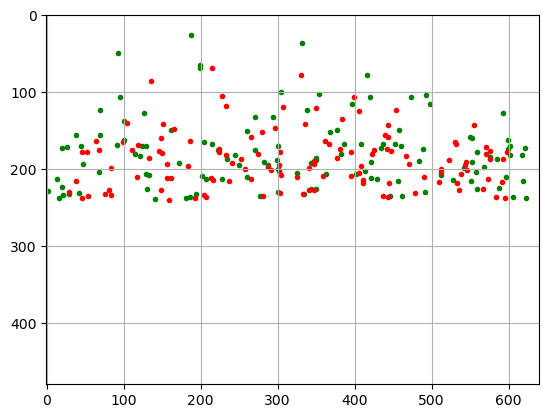

In [ ]:
index = 2

measurements = data.get_measurement_points(index)
matches = vo.data_association(measurements, vo.get_map())
image_points = matches['points_1']
world_points = matches['points_2']
appearances = matches['appearances']

gt_pose = data.get_trajectory()[index]['ground_truth_pose'] + [0, 0, 0]
w_T_r = utils.v2T(np.array(gt_pose))
R = w_T_r[:3, :3]
t = w_T_r[:3, 3]

estimated_w_T_r = vo.get_trajectory()['poses'][index]
print('Estimated pose: \n', np.round(estimated_w_T_r, 2))

# r_T_c = camera.get_camera_transform()
# w_T_c = np.dot(estimated_w_T_r, r_T_c)
# estimated_w_T_r = np.dot(estimated_w_T_r, r_T_c)

projected_points = []
projected_points_gt = []
for i in range(len(world_points)):
    proj_image_point_hom, proj_image_point = camera.project_point(world_points[i])
    if proj_image_point_hom is None or proj_image_point is None:
        continue
    projected_points.append(proj_image_point)

    proj_image_point_hom_gt, proj_image_point_gt = camera.project_point(world_points[i])
    if proj_image_point_hom_gt is None or proj_image_point_gt is None:
        continue
    projected_points_gt.append(proj_image_point_gt)

fig, ax = plt.subplots()
ax.imshow(np.ones((480, 640, 3)))
ax.scatter([point[0] for point in image_points], [point[1] for point in image_points], color='green', marker='.')
ax.scatter([point[0] for point in projected_points], [point[1] for point in projected_points], color='red', marker='.')
#ax.scatter([point[0] for point in projected_points_gt], [point[1] for point in projected_points_gt], color='blue', marker='*')
plt.grid()
plt.show()

In [ ]:
world_points = vo.get_map()['points']
print('Number of world points: ', len(world_points))

x_coords = [point[0] for point in world_points]
y_coords = [point[1] for point in world_points]
z_coords = [point[2] for point in world_points]

fig = go.Figure()
fig.add_trace(go.Scatter3d(x=x_coords, y=y_coords, z=z_coords, mode='markers', marker=dict(size=1)))

fig.show()

Number of world points:  490
